# OMAT5204M Data Science Unit 6 code blocks

This Notebook contains all the code blocks to demonstrate the processes introduced in Unit 6. This has been necessitated due to the limitations of the Coursera platform.

You should run the code blocks as instructed in the main body of the course.

Each code block has a heading that matches the appropriate code block in the main course text.


## Code Block 6.1
The code below analyses the structure of the Karate Club network by measuring how spread out the graph is (diameter) and identifying the most centrally located node(s) in terms of distance to others (radius).

In [1]:
import networkx as nx

# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the diameter of the graph
diameter = nx.diameter(G)

# Compute the radius of the graph
radius = nx.radius(G)

# Print the results
print("Karate Club Graph Analysis:")
print(f"Diameter of the graph: {diameter}")
print(f"Radius of the graph: {radius}")

Karate Club Graph Analysis:
Diameter of the graph: 5
Radius of the graph: 3


## Code Block 6.2 
This code loads a Facebook friendship network, constructs the graph, and reports:

  - Number of users (nodes)
  - Number of friendships (edges)
  - Average number of friends per user (average degree)
  - Number of disconnected sub-networks (connected components)

In [2]:
import networkx as nx

# Load the Facebook dataset
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the average degree
degree_sum = sum(dict(G.degree()).values())  # Sum of all node degrees
average_degree = degree_sum / G.number_of_nodes()

# Compute the number of connected components
num_components = nx.number_connected_components(G)

# Print basic information about the original graph
print("Original Graph Information:")
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Number of Connected Components: {num_components}")

Original Graph Information:
Number of Nodes: 4039
Number of Edges: 88234
Average Degree: 43.69
Number of Connected Components: 1


## Code Block 6.3 
The code analyses a Facebook social network graph and visualizes how many users have a certain number of friends (connections), helping to understand the structure and connectivity of the network.

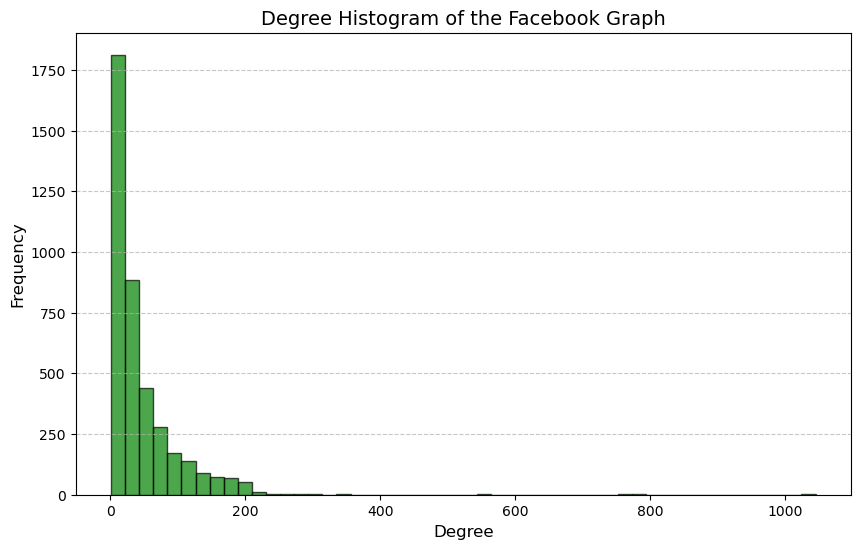

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the file
file_path = "facebook_combined.txt"
fb = nx.read_edgelist(file_path, nodetype=int)

# Compute the degree of each node
degree_sequence = [degree for _, degree in fb.degree()]

# Plot the degree histogram
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title("Degree Histogram of the Facebook Graph", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
output_file = "facebook_degree_histogram.png"
plt.savefig(output_file, dpi=600, format="png")

# Display the plot
plt.show()

## Code Block 6.4 
The code below generates a scale-free network using the Barabási–Albert model, extracts its node degrees, and fits a power-law distribution to those degrees to analyse whether the network follows a scale-free structure.

In [4]:
!pip install powerlaw
import networkx as nx
import powerlaw

# Load or generate a graph
G = nx.barabasi_albert_graph(1000, 2)  # Example: Scale-free network

# Compute the degree sequence
degree_sequence = [d for n, d in G.degree()]

# Fit power-law distribution
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit


## Code Block 6.5 
The code below extracts the power-law exponent from a fitted model and displays it in a readable format. The exponent characterises how quickly the probabilities decrease in a power-law distribution.

In [5]:
gamma = fit.power_law.alpha  # Power-law exponent
print(f"Estimated Power-Law Exponent (γ): {gamma:.2f}")

Estimated Power-Law Exponent (γ): 3.07


## Code Block 6.6 
This code compares how well a power-law distribution fits the data compared to an exponential distribution, using a statistical model comparison test provided by the powerlaw Python package.

In [6]:
# Compare power-law fit with exponential & lognormal distributions
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Power-Law vs. Exponential: R={R:.2f}, p={p:.4f}")

Power-Law vs. Exponential: R=14.45, p=0.0031


## Code Block 6.7 
This code compares two models and prints which one fits the data better, based on statistical test results.

In [7]:
# If R > 0 and p < 0.05, power-law is a better fit than exponential.
if R > 0 and p < 0.05:
    print("Power-law is a better fit than exponential.")
else:
    print("Exponential distribution may fit better.")

Power-law is a better fit than exponential.


## Code Block 6.8 
This code computes how far apart any two users are in the Facebook network (in terms of friendship connections) and saves that information for analysis.

In [8]:
import networkx as nx
import pandas as pd

# Load the Facebook network dataset
# Ensure the file 'facebook_combined.txt' is in the working directory
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the shortest path lengths for all pairs of nodes
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Convert the shortest path dictionary to a DataFrame for better readability
shortest_path_df = pd.DataFrame.from_dict(shortest_paths, orient="index")

# Save the shortest path lengths to a CSV file (optional)
shortest_path_df.to_csv("facebook_shortest_path_lengths.csv", index=True)

# Print a small sample of the shortest path lengths
print("Shortest Path Lengths (Sample):")
print(shortest_path_df.head())

Shortest Path Lengths (Sample):
   0    1    2    3    4    5    6    7    8    9    ...  846  847  848  849  \
0    0    1    1    1    1    1    1    1    1    1  ...    6    6    6    6   
1    1    0    2    2    2    2    2    2    2    2  ...    7    7    7    7   
2    1    2    0    2    2    2    2    2    2    2  ...    7    7    7    7   
3    1    2    2    0    2    2    2    2    2    1  ...    7    7    7    7   
4    1    2    2    2    0    2    2    2    2    2  ...    7    7    7    7   

   850  851  852  853  854  855  
0    6    6    6    6    6    6  
1    7    7    7    7    7    7  
2    7    7    7    7    7    7  
3    7    7    7    7    7    7  
4    7    7    7    7    7    7  

[5 rows x 4039 columns]


## Code Block 6.9 
The code loads a Facebook user network, calculates the shortest distance between all users, saves the results to a CSV file, and displays the distance between two specific users (nodes 20 and 42). **Try to find the shortest distance between other users.**

In [9]:
import networkx as nx
import pandas as pd

# Load the Facebook network dataset
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the shortest path lengths for all pairs of nodes
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Convert the shortest path dictionary to a DataFrame for better readability
shortest_path_df = pd.DataFrame.from_dict(shortest_paths, orient="index")

# Save the shortest path lengths to a CSV file (optional)
shortest_path_df.to_csv("facebook_shortest_path_lengths.csv", index=True)

# Access the shortest path length between node 20 and node 42
print("Shortest path length between node 20 and 42:")
print(shortest_paths[20][42])

Shortest path length between node 20 and 42:
2


## Code Block 6.10 
This code calculates the diameter of the Facebook network, which is the longest shortest path between any two nodes in the graph — giving an idea of how far apart the most distant users are in terms of network hops.

In [10]:
# Calculating the diameter of the Facebook network
diameter = max(nx.eccentricity(G, sp=shortest_paths).values())
print("Diameter of the Facebook network:", diameter)


Diameter of the Facebook network: 8


## Code Block 6.11 
The code calculates and prints the overall average of all shortest path lengths between nodes in a graph — a measure of how efficiently information or connections travel across the network.

In [11]:
import numpy as np

# Compute the average shortest path length for each node
average_path_lengths_per_node = [
    np.mean(list(lengths.values()))  # Average path length from one node to all others
    for lengths in shortest_paths.values()
]

# Compute the overall average shortest path length across all nodes
overall_average_path_length = np.mean(average_path_lengths_per_node)

# Print the result
print(f"Overall average shortest path length: {overall_average_path_length:.4f}")

Overall average shortest path length: 3.6916


## Code Block 6.12 
It reads a Facebook network from a text file, calculates the shortest path lengths between all pairs of users (nodes), and then plots a histogram showing how frequently each path length occurs (excluding self-loops). Note: This code may take some time to run. Please be patient.

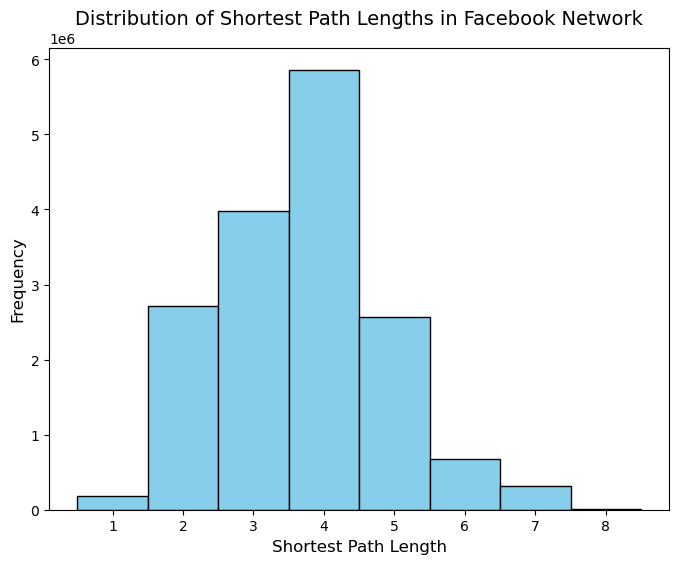

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Facebook network
graph_file = "facebook_combined.txt"  # Replace with the actual file path
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(G))

# Flatten the shortest path lengths into a list (ignoring self-loops)
path_lengths = []
for source, lengths in shortest_path_lengths.items():
    for target, length in lengths.items():
        if source != target:  # Exclude self-loops
            path_lengths.append(length)

# Plot the distribution of shortest path lengths
plt.figure(figsize=(8, 6))
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 2), color="skyblue", edgecolor="black", align="left")
plt.title("Distribution of Shortest Path Lengths in Facebook Network", fontsize=14)
plt.xlabel("Shortest Path Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
#plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure
output_file = "shortest_path_distribution_facebook.png"
plt.savefig(output_file, dpi=300)
plt.show()

## Code Block 6.13 
The following code loads a Facebook friendship graph, calculates how many connections each user has, and identifies the top 5 most connected users.

In [13]:
import networkx as nx

# Load the Facebook dataset
graph_file = "facebook_combined.txt"

# Read the graph data
try:
    G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)
except FileNotFoundError:
    print("Error: The file 'facebook_combined.txt' was not found. Please ensure the dataset is available in the working directory.")
    exit()

# Compute the degree of each node
degree_dict = dict(G.degree())

# Sort nodes by degree in descending order
top_5_hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 nodes with highest degree
print("Top 5 Nodes with Highest Degree (Hubs) in the Facebook Network:")
for node, degree in top_5_hubs:
    print(f"Node {node}: Degree {degree}")


Top 5 Nodes with Highest Degree (Hubs) in the Facebook Network:
Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347


## Code Block 6.14 
Similar to the previous code, The following finds and prints the top 10 most connected nodes (by number of edges) in the graph G, highlighting key hubs in a Facebook network.

In [14]:
# Compute the degree of each node
degree_dict = dict(G.degree())

# Sort nodes by degree in descending order
top_10_hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 5 nodes with highest degree
print("Top 10 Nodes with Highest Degree (Hubs) in the Facebook Network:")
for node, degree in top_10_hubs:
    print(f"Node {node}: Degree {degree}")

Top 10 Nodes with Highest Degree (Hubs) in the Facebook Network:
Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347
Node 2543: Degree 294
Node 2347: Degree 291
Node 1888: Degree 254
Node 1800: Degree 245
Node 1663: Degree 235


## Code Block 6.15 
The code loads a Facebook social network graph from a file, checks whether node 107 exists, and removes it from a copy of the graph if it does. It is important to see how removing a node affects the entire notebook in terms of connectivity and other centrality measures.

In [15]:
import networkx as nx

# Load the Facebook dataset
graph_file = "facebook_combined.txt"

# Read the graph data
try:
    G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)  # Load nodes as integers
except FileNotFoundError:
    print("Error: The file 'facebook_combined.txt' was not found. Please ensure the dataset is available in the working directory.")
    exit()

# Check if node 107 exists and remove it
G_pruned = G.copy()  # Create a copy of the original graph
if 107 in G_pruned:  # Check for integer node, NOT string
    G_pruned.remove_node(107)
    print("\n✅ Node 107 has been removed from the graph.")
else:
    print("\n⚠️ Node 107 is NOT present in the graph. But it may have existed before.")


✅ Node 107 has been removed from the graph.


## Code Block 6.16 
The code calculates and prepares to display information about how the structure of the graph changed (in terms of connectivity) after removing node 107, specifically by identifying and counting its connected components.

In [16]:
# Compute connected components after removal
connected_components = list(nx.connected_components(G_pruned))
num_components = len(connected_components)

# Print pruned graph information
print("\n📊 Graph Information After Removing Node 107:")
print(f"Number of connected components: {num_components}")

# Optionally, display the size of each component
for i, component in enumerate(connected_components, start=1):
    print(f" - Component {i}: {len(component)} nodes")


📊 Graph Information After Removing Node 107:
Number of connected components: 12
 - Component 1: 4027 nodes
 - Component 2: 1 nodes
 - Component 3: 1 nodes
 - Component 4: 1 nodes
 - Component 5: 1 nodes
 - Component 6: 1 nodes
 - Component 7: 1 nodes
 - Component 8: 1 nodes
 - Component 9: 1 nodes
 - Component 10: 1 nodes
 - Component 11: 1 nodes
 - Component 12: 1 nodes


## Code Block 6.17 

In [17]:
print(f"🔹 Number of Nodes: {G_pruned.number_of_nodes()}")

🔹 Number of Nodes: 4038


## Code Block 6.18 

In [18]:
print(f"🔹 Number of Edges: {G_pruned.number_of_edges()}")

🔹 Number of Edges: 87189


## Code Block 6.19 

In [19]:
print(f"🔹 Number of Connected Components: {num_components}")

🔹 Number of Connected Components: 12


## Code Block 6.20 
The code sorts all connected components by size and prints a label in preparation to display the 10 largest ones — useful for analysing the most significant subgraphs in a larger network.

In [20]:
# Sort connected components by size in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Print the top 10 largest connected components
print("\n📌 Connected Components (Top 10 Largest):")
for i, component in enumerate(sorted_components[:10], start=1):
    print(f"Component {i} (Size: {len(component)}): {component}")


📌 Connected Components (Top 10 Largest):
Component 1 (Size: 4027): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 2

## Code Block 6.21 

In [21]:
for i, component in enumerate(sorted_components[:10], start=1):  
    print(f"⭐ Component {i}: {len(component)} nodes")

⭐ Component 1: 4027 nodes
⭐ Component 2: 1 nodes
⭐ Component 3: 1 nodes
⭐ Component 4: 1 nodes
⭐ Component 5: 1 nodes
⭐ Component 6: 1 nodes
⭐ Component 7: 1 nodes
⭐ Component 8: 1 nodes
⭐ Component 9: 1 nodes
⭐ Component 10: 1 nodes


## Code Block 6.22 

In [22]:
# Save full component list to a file
with open("connected_components.txt", "w") as file:
    for i, component in enumerate(sorted_components, start=1):
        file.write(f"Component {i}: {len(component)} nodes\n")

## Code Block 6.23 

In [23]:
print("\n📂 Connected components information saved to 'connected_components.txt'.")


📂 Connected components information saved to 'connected_components.txt'.


## Code Block 6.24 
The code below reads a Facebook friendship network from a file and prints how many users and friendships are present.

In [24]:
import networkx as nx

# Load the Facebook dataset
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Print basic information about the graph manually (since nx.info() is deprecated)
print("Original Graph Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is directed: {G.is_directed()}")

Original Graph Information:
Number of nodes: 4039
Number of edges: 88234
Is directed: False


## Code Block 6.25 

In [25]:
print(f"Number of Nodes: {G.number_of_nodes()}")

Number of Nodes: 4039


## Code Block 6.26 

In [26]:
print(f"Number of Edges: {G.number_of_edges()}")

Number of Edges: 88234


## Code Block 6.27 

In [27]:
# Prune the graph by removing node '0'
if 0 in G:
    G_pruned = G.copy()  # Create a copy of the original graph
    G_pruned.remove_node(0)  # Remove node '0'

    # Compute the number of connected components in the pruned graph
    num_connected_components = nx.number_connected_components(G_pruned)

    # Print pruned graph information
    print("\nPruned Graph Information:")
    print(f"Number of Nodes: {G_pruned.number_of_nodes()}")
    print(f"Number of Edges: {G_pruned.number_of_edges()}")
    print(f"Number of Connected Components in the Pruned Graph: {num_connected_components}")

else:
    print("\nNode '0' is not present in the graph.")


Pruned Graph Information:
Number of Nodes: 4038
Number of Edges: 87887
Number of Connected Components in the Pruned Graph: 19


## Code Block 6.28 

In [28]:
import networkx as nx

# Load the Facebook dataset
# The file 'facebook_combined.txt' is assumed to be in edge list format.
# Download the dataset from: https://snap.stanford.edu/data/ego-Facebook.html
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Print basic information about the original graph
print("Original Graph Information:")

Original Graph Information:


## Code Block 6.29 

In [29]:
print(f"Number of Nodes: {G.number_of_nodes()}")

Number of Nodes: 4039


## Code Block 6.30 

In [30]:
print(f"Number of Edges: {G.number_of_edges()}")

Number of Edges: 88234


## Code Block 6.31 

In [31]:
# Prune the graph by removing node '0'
if 0 in G:
    G_pruned = G.copy()  # Create a copy of the original graph
    G_pruned.remove_node(0)  # Remove node '0'

    # Compute the connected components in the pruned graph
    connected_components = list(nx.connected_components(G_pruned))
    num_connected_components = len(connected_components)

    # Ensure there are 19 connected components
    if num_connected_components == 19:
        # Print pruned graph information
        print("\nPruned Graph Information:")
        print(f"Number of Nodes: {G_pruned.number_of_nodes()}")
        print(f"Number of Edges: {G_pruned.number_of_edges()}")
        print(f"Number of Connected Components: {num_connected_components}")

        # Print the sizes of the connected components
        component_sizes = [len(component) for component in connected_components]
        print("\nSizes of the Connected Components:")
        for i, size in enumerate(component_sizes, start=1):
            print(f"Component {i}: {size} nodes")

    else:
        print(f"\nThe number of connected components is {num_connected_components}, not 19. Please verify the input graph.")

else:
    print("\nNode '0' is not present in the graph.")


Pruned Graph Information:
Number of Nodes: 4038
Number of Edges: 87887
Number of Connected Components: 19

Sizes of the Connected Components:
Component 1: 4015 nodes
Component 2: 1 nodes
Component 3: 1 nodes
Component 4: 1 nodes
Component 5: 1 nodes
Component 6: 2 nodes
Component 7: 1 nodes
Component 8: 1 nodes
Component 9: 1 nodes
Component 10: 3 nodes
Component 11: 1 nodes
Component 12: 1 nodes
Component 13: 1 nodes
Component 14: 1 nodes
Component 15: 2 nodes
Component 16: 2 nodes
Component 17: 1 nodes
Component 18: 1 nodes
Component 19: 1 nodes


## Code Block 6.32 

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Facebook graph
# Ensure 'facebook_combined.txt' is in the same directory.
# It can be downloaded from: https://snap.stanford.edu/data/facebook_combined.txt.gz
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 nodes with the highest degree centrality
top_10_nodes = sorted_degree_centrality[:10]

# Display the top 10 nodes with their normalized degree centrality
print("Top 10 Most Central Nodes (Based on Degree Centrality):")
for node, centrality in top_10_nodes:
    print(f"Node {node}: {centrality:.4f}")

Top 10 Most Central Nodes (Based on Degree Centrality):
Node 107: 0.2588
Node 1684: 0.1961
Node 1912: 0.1870
Node 3437: 0.1355
Node 0: 0.0859
Node 2543: 0.0728
Node 2347: 0.0721
Node 1888: 0.0629
Node 1800: 0.0607
Node 1663: 0.0582


## Code Block 6.33 

In [33]:
for node, centrality in top_10_nodes:
    print(f"Node ID: {node}, Normalized Degree Centrality: {centrality:.4f}")

Node ID: 107, Normalized Degree Centrality: 0.2588
Node ID: 1684, Normalized Degree Centrality: 0.1961
Node ID: 1912, Normalized Degree Centrality: 0.1870
Node ID: 3437, Normalized Degree Centrality: 0.1355
Node ID: 0, Normalized Degree Centrality: 0.0859
Node ID: 2543, Normalized Degree Centrality: 0.0728
Node ID: 2347, Normalized Degree Centrality: 0.0721
Node ID: 1888, Normalized Degree Centrality: 0.0629
Node ID: 1800, Normalized Degree Centrality: 0.0607
Node ID: 1663, Normalized Degree Centrality: 0.0582


## Code Block 6.34 
In the code below, the output is a printed list of up to 10 node IDs, including `0` and `107`. These nodes are likely intended to be used as a sample subset for further network as (e.g., betweenness centrality) to save computation time on large graphs.

In [34]:
import networkx as nx
import random

# Load the Facebook dataset
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Ensure nodes 0 and 107 exist in the graph
if 0 not in G.nodes or 107 not in G.nodes:
    raise ValueError("Node 0 or Node 107 is not present in the network.")

# Select 10 random nodes, including 0 and 107
random_nodes = random.sample(list(G.nodes), 8)  # Randomly select 8 other nodes
random_nodes.extend([0, 107])  # Ensure 0 and 107 are included
random_nodes = list(set(random_nodes))  # Remove any duplicates

print("Selected Nodes for Betweenness Centrality Computation:", random_nodes)

Selected Nodes for Betweenness Centrality Computation: [3616, 0, 3140, 1800, 107, 3888, 2736, 1939, 956, 2302]


## Code Block 6.35 
Note: This code may take some time to run. Please be patient.

In [35]:
# Compute betweenness centrality for the selected nodes
betweenness_centrality = nx.betweenness_centrality(G)
selected_betweenness = {node: betweenness_centrality[node] for node in random_nodes}

# Display the betweenness centrality for the selected nodes
print("\n Betweenness Centrality for Selected Nodes:")


 Betweenness Centrality for Selected Nodes:


## Code Block 6.36 

In [36]:
for node, centrality in selected_betweenness.items():
    print(f"Node {node}: {centrality:.6f}")

Node 3616: 0.000001
Node 0: 0.146306
Node 3140: 0.000050
Node 1800: 0.000153
Node 107: 0.480518
Node 3888: 0.000001
Node 2736: 0.000000
Node 1939: 0.000103
Node 956: 0.000000
Node 2302: 0.000266


## Code Block 6.37 
The code below performs a small analysis on a **Facebook social network graph** using **NetworkX**. The printed closeness centrality values tell you how “central” each node is in the Facebook network. Nodes with higher values are more efficiently connected to others, meaning they can reach others with fewer hops on average.

In [37]:
import networkx as nx
import random

# Load the Facebook network
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Ensure nodes 0 and 107 are in the graph
if 0 not in G or 107 not in G:
    print("Nodes 0 or 107 are not present in the graph.")
    exit()

# Randomly select 8 other nodes from the graph (convert G.nodes to a list)
random_nodes = random.sample(list(G.nodes), 8)

# Include nodes 0 and 107
selected_nodes = [0, 107] + random_nodes[:8]

# Compute closeness centrality for the selected nodes
closeness_centrality = {node: nx.closeness_centrality(G, node) for node in selected_nodes}

# Display the results
print("Closeness Centrality for Selected Nodes:")

Closeness Centrality for Selected Nodes:


## Code Block 6.38 

In [38]:
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

Node 0: 0.3533
Node 107: 0.4597
Node 3602: 0.2394
Node 132: 0.2614
Node 1398: 0.3160
Node 3030: 0.2826
Node 14: 0.2613
Node 3495: 0.2785
Node 511: 0.2883
Node 208: 0.2612


## Code Block 6.39 

In [39]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute eigenvector centrality
print("Calculating Eigenvector Centrality...")

Calculating Eigenvector Centrality...


## Code Block 6.40 

In [40]:
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
top_10_eigenvector = sorted_eigenvector[:10]

print("\nTop 10 Nodes by Eigenvector Centrality:")


Top 10 Nodes by Eigenvector Centrality:


## Code Block 6.41 

In [41]:
for node, centrality in top_10_eigenvector:
    print(f"Node {node}: {centrality:.4f}")

Node 1912: 0.0954
Node 2266: 0.0870
Node 2206: 0.0861
Node 2233: 0.0852
Node 2464: 0.0843
Node 2142: 0.0842
Node 2218: 0.0842
Node 2078: 0.0841
Node 2123: 0.0837
Node 1993: 0.0835


## Code Block 6.42 
The code below analyses the **clustering properties** of a Facebook friendship network using **NetworkX**. **Local Clustering Coefficient** (values between 0 and 1) tells you how "cliquish" each node's neighbourhood is.  **Global Clustering Coefficient** is the average of local clustering values and indicates the overall tendency of the network to form tightly knit groups. **Transitivity** gives a single measure of the presence of triangles in the graph, often lower than the average clustering if the degree distribution is skewed. These metrics help understand how socially cohesive the network is — useful in analysing real-world networks like Facebook. like Facebook.

In [42]:
import networkx as nx

# Load the Facebook graph
# Download 'facebook_combined.txt' and ensure it's in the same directory as the script.
# The file can be obtained from https://snap.stanford.edu/data/facebook_combined.txt.gz
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute local clustering coefficients for each node
local_clustering = nx.clustering(G)

# Compute the global clustering coefficient (average clustering)
global_clustering = nx.average_clustering(G)

# Compute transitivity
transitivity = nx.transitivity(G)

# Print results
print("Local Clustering Coefficient for Each Node (Sample):")
for node, coeff in list(local_clustering.items())[:10]:  # Print sample of 10 nodes
    print(f"Node {node}: {coeff:.4f}")

print(f"\nGlobal Clustering Coefficient (Average Clustering): {global_clustering:.4f}")
print(f"Transitivity (Global Measure of Clustering): {transitivity:.4f}")

Local Clustering Coefficient for Each Node (Sample):
Node 0: 0.0420
Node 1: 0.4191
Node 2: 0.8889
Node 3: 0.6324
Node 4: 0.8667
Node 5: 0.3333
Node 6: 0.9333
Node 7: 0.4316
Node 8: 0.6786
Node 9: 0.3972

Global Clustering Coefficient (Average Clustering): 0.6055
Transitivity (Global Measure of Clustering): 0.5192


## Code Block 6.43 
In the code below, the final printed number tells you how many groups of three users in the Facebook network are all mutually connected — a common indicator of tightly-knit social circles.

In [43]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the number of triangles for each node
triangles = nx.triangles(G)

# Compute the total number of unique triangles
# Each triangle is counted three times (once for each vertex), so we divide the sum by 3
num_unique_triangles = sum(triangles.values()) // 3

# Print the result
print(f"The number of unique triangles in the Facebook network is: {num_unique_triangles}")


The number of unique triangles in the Facebook network is: 1612010


## Code Block 6.44 
The code below analyses the **Facebook social network graph** by computing the number of **triangles** in the network using the `networkx` library.
The first printed value shows how many **distinct triangles** exist in the network — this can indicate how clustered or tightly connected the social graph is. The second value gives the **average triangle participation per node**, providing insight into how commonly users are part of closely-knit friendship groups.

In [44]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the number of triangles each node is part of
triangles = nx.triangles(G)

# Compute the total number of triangles
total_triangles = sum(triangles.values()) // 3  # Unique triangles

# Compute the average number of triangles per node
average_triangles_per_node = sum(triangles.values()) / len(G.nodes)

# Print the results
print(f"The total number of unique triangles in the Facebook network is: {total_triangles}")
print(f"The average number of triangles per node in the Facebook network is: {average_triangles_per_node:.2f}")

The total number of unique triangles in the Facebook network is: 1612010
The average number of triangles per node in the Facebook network is: 1197.33


## Code Block 6.45 
The code below analyses a Facebook social network graph and calculates a structural property related to *triangles* in the network. The printed median tells you how many such triangle relationships a *typical* user (node) is part of in the Facebook network. A higher median suggests that users tend to be part of tightly-knit groups (i.e., friends of friends are often friends themselves), indicating strong clustering behaviour in the network.xplanation!

In [45]:
import networkx as nx
import numpy as np

# Load the Facebook graph
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Compute the number of triangles for each node
triangles = nx.triangles(G)

# Get the list of triangle counts
triangle_counts = list(triangles.values())

# Compute the median of the triangle counts
median_triangle_count = np.median(triangle_counts)

# Print the result
print(f"The median number of triangles that a node is a part of in the Facebook network is: {median_triangle_count}")

The median number of triangles that a node is a part of in the Facebook network is: 161.0


## Code Block 6.46 
The code below uses the **NetworkX** library to analyse a graph based on a file named `"facebook_combined.txt"`, which contains edge list data representing connections between nodes (e.g., people in a social network). The number of bridges tells you how many **critical connections** exist in the network. Each bridge (edge) in the list is a **vulnerable link**; removing it would fragment the graph, so these are key to understanding the **structural integrity** of the network.h your own data!

In [46]:
import networkx as nx

# Create or load a graph
G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Find all bridges in the graph
bridges = list(nx.bridges(G))

# Output the bridges
print(f"Number of Bridges: {len(bridges)}")
print("Bridges in the Graph:", bridges)

Number of Bridges: 75
Bridges in the Graph: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


## Code Block 6.47 
The code below analyses a **Facebook social network graph** to identify **local bridges**—edges that connect nodes whose shortest path (after the edge is removed) becomes longer than 2. **Local bridges** are important in social networks as they connect different parts of the graph with **weak ties**, potentially enabling the flow of new information across communities. The output tells you how many such weak, structurally important connections exist in the Facebook network and gives you examples to inspect.

In [47]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Function to check if an edge is a local bridge
def is_local_bridge(G, u, v):
    # Remove the edge (u, v) and check the shortest path distance
    G.remove_edge(u, v)
    try:
        shortest_path_length = nx.shortest_path_length(G, source=u, target=v)
    except nx.NetworkXNoPath:
        shortest_path_length = float('inf')  # No path exists after edge removal
    G.add_edge(u, v)  # Re-add the edge after check
    return shortest_path_length > 2  # Local bridge condition

# Compute all local bridges
local_bridges = []
for u, v in G.edges():
    if is_local_bridge(G, u, v):
        local_bridges.append((u, v))

# Output the results
print(f"Number of Local Bridges: {len(local_bridges)}")
print(f"List of Local Bridges (Sample): {local_bridges[:10]}")  # Print first 10 local bridges

Number of Local Bridges: 78
List of Local Bridges (Sample): [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210)]


## Code Block 6.48 
The code below performs network analysis on a Facebook social network graph using the networkx library. It calculates the **degree assortativity coefficient** of the graph. This metric measures the tendency of nodes to connect to other nodes with a similar degree (number of connections). The value typically ranges from -1 to 1:
   - A **positive** value indicates that high-degree nodes tend to connect to other high-degree nodes (assortative mixing).
   - A **negative** value suggests that high-degree nodes tend to connect to low-degree nodes (disassortative mixing).
   - A value near **0** indicates little or no assortative mixing.

The result is printed with 4 decimal places, showing the degree assortativity coefficient of the Facebook network.

In [48]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"  # Ensure this file is in the working directory
try:
    G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)
except FileNotFoundError:
    print("Error: The file 'facebook_combined.txt' was not found. Please ensure it exists in the working directory.")
    exit()

# Compute degree assortativity coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Print the result
print(f"Degree Assortativity Coefficient of the Facebook Network: {degree_assortativity:.4f}")

Degree Assortativity Coefficient of the Facebook Network: 0.0636


## Code Block 6.49 
The code below performs PageRank analysis on a social network graph (specifically a Facebook graph). It reads a Facebook social network file, converts it into a directed graph, computes PageRank scores for each user (node), prints a sample, and saves all scores to a file.

In [49]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"  # Ensure this file is in the same directory
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Convert the graph to a directed graph (PageRank works on directed graphs)
G_directed = G.to_directed()

# Compute the PageRank vector
# The damping factor (alpha) is usually set to 0.85
pagerank_vector = nx.pagerank(G_directed, alpha=0.85)

# Display the PageRank vector for a sample of 10 nodes
print("PageRank vector (Sample):")
for node, rank in list(pagerank_vector.items())[:10]:
    print(f"Node {node}: {rank:.6f}")

# Save the PageRank vector to a file for further analysis
with open("pagerank_facebook.txt", "w") as f:
    for node, rank in sorted(pagerank_vector.items(), key=lambda x: x[1], reverse=True):
        f.write(f"Node {node}: {rank:.6f}\n")

print("\nPageRank computation completed. Results saved to 'pagerank_facebook.txt'.")

PageRank vector (Sample):
Node 0: 0.006290
Node 1: 0.000236
Node 2: 0.000203
Node 3: 0.000226
Node 4: 0.000238
Node 5: 0.000202
Node 6: 0.000180
Node 7: 0.000263
Node 8: 0.000237
Node 9: 0.000600

PageRank computation completed. Results saved to 'pagerank_facebook.txt'.


## Code Block 6.50 
The code below performs ego-network analysis on a Facebook social graph using the networkx library. An **ego-network** is the subgraph made up of a specific node (the "ego") and the nodes connected to it within a certain distance (radius).

In [50]:
import networkx as nx

# Load the Facebook graph
graph_file = "facebook_combined.txt"  # Ensure this file is in the same directory
G = nx.read_edgelist(graph_file, create_using=nx.Graph(), nodetype=int)

# Node to access the ego-network
ego_node = 107

# Check if the node exists in the network
if ego_node not in G.nodes:
    raise ValueError(f"Node {ego_node} not found in the network.")

# Dictionary to store results for different radii
ego_network_stats = {}

# Compute ego-networks for radii 1, 2, and 3
for radius in [1, 2, 3]:
    ego_network = nx.ego_graph(G, ego_node, radius=radius)
    ego_network_stats[radius] = {
        "nodes": ego_network.number_of_nodes(),
        "edges": ego_network.number_of_edges()
    }

# Display results
print(f"Ego-Network Statistics for Node {ego_node}:")
for radius, stats in ego_network_stats.items():
    print(f"Radius {radius}: {stats['nodes']} nodes, {stats['edges']} edges")

Ego-Network Statistics for Node 107:
Radius 1: 1046 nodes, 27795 edges
Radius 2: 2687 nodes, 58061 edges
Radius 3: 3780 nodes, 86055 edges


## Code Block 6.51 
The code below loads a Facebook social graph, extracts ego-networks (i.e., the subgraph consisting of a node and its immediate neighbors), counts the number of edges in each of the first 10 ego-networks, and identifies which of these is the most densely connected.

In [51]:
import networkx as nx

# Load the Facebook combined dataset
file_path = "facebook_combined.txt"
graph = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Get the list of ego-nodes (nodes for which ego-networks will be created)
ego_nodes = list(graph.nodes())[:10]  # Select the first 10 nodes for simplicity

# Initialize a dictionary to store the number of edges for each ego-network
ego_network_edges = {}

# Iterate over the ego-nodes and calculate the number of edges in each ego-network
for node in ego_nodes:
    # Create the ego-network for the current node
    ego_network = nx.ego_graph(graph, node)
    
    # Calculate the number of edges in the ego-network
    num_edges = ego_network.number_of_edges()
    
    # Store the result in the dictionary
    ego_network_edges[node] = num_edges

# Find the ego-network with the maximum number of edges
most_dense_ego_node = max(ego_network_edges, key=ego_network_edges.get)
most_dense_ego_edges = ego_network_edges[most_dense_ego_node]

# Print the results
print("Number of edges in each ego-network:")
for node, edges in ego_network_edges.items():
    print(f"Ego-network of node {node}: {edges} edges")

print(f"\nThe most densely connected ego-network is for node {most_dense_ego_node}, "
      f"with {most_dense_ego_edges} edges.")

Number of edges in each ego-network:
Ego-network of node 0: 2866 edges
Ego-network of node 1: 74 edges
Ego-network of node 2: 50 edges
Ego-network of node 3: 103 edges
Ego-network of node 4: 49 edges
Ego-network of node 5: 39 edges
Ego-network of node 6: 20 edges
Ego-network of node 7: 102 edges
Ego-network of node 8: 27 edges
Ego-network of node 9: 691 edges

The most densely connected ego-network is for node 0, with 2866 edges.


## Code Block 6.52 
The code below helps analyse how socially connected node 107 is within the Facebook network by creating a localised view (ego-network) and computing basic metrics like size and average connectivity.

In [52]:
import networkx as nx

# Load the Facebook combined dataset
file_path = "facebook_combined.txt"
graph = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Specify the node for which the ego-network is to be analyzed
ego_node = 107

# Create the ego-network for node 107
ego_network = nx.ego_graph(graph, ego_node)

# Calculate the number of nodes in the ego-network
node_count = ego_network.order()  # G.order() gives the number of nodes
average_degree = sum(dict(ego_network.degree()).values()) / node_count

# Print the results
print(f"The ego-network of node {ego_node} has {node_count} nodes.")
print(f"The average degree of the ego-network is {int(average_degree)}.")

The ego-network of node 107 has 1046 nodes.
The average degree of the ego-network is 53.


## Code Block 6.53 
The code below analyses the Facebook combined graph using the networkx library to investigate ego-networks and how nodes are shared across them. The code helps understand how embedded or central each node is within the network by measuring how frequently a node appears in others' local ego-networks.

In [53]:
import networkx as nx
from collections import defaultdict

# Load the Facebook combined graph
file_path = "facebook_combined.txt"  # Replace with the path to your file
graph = nx.read_edgelist(file_path, create_using=nx.Graph())

# Initialize a dictionary to store the ego-networks each node belongs to
node_to_egonets = defaultdict(list)

# Compute ego-networks for all nodes in the graph
for node in graph.nodes():
    ego_net = nx.ego_graph(graph, node)  # Get the ego-network for the node
    for ego_node in ego_net.nodes():
        node_to_egonets[ego_node].append(node)

# Count how many ego-networks each node belongs to
nodes_egonet_counts = {node: len(egonets) for node, egonets in node_to_egonets.items()}

# Categorize nodes based on the number of ego-networks they belong to
categories = {
    "Exactly 1 ego-network": 0,
    "Exactly 2 ego-networks": 0,
    "Exactly 3 ego-networks": 0,
    "Exactly 4 ego-networks": 0,
    "More than 4 ego-networks": 0,
}

for count in nodes_egonet_counts.values():
    if count == 1:
        categories["Exactly 1 ego-network"] += 1
    elif count == 2:
        categories["Exactly 2 ego-networks"] += 1
    elif count == 3:
        categories["Exactly 3 ego-networks"] += 1
    elif count == 4:
        categories["Exactly 4 ego-networks"] += 1
    else:
        categories["More than 4 ego-networks"] += 1

# Print the results
print("Number of nodes belonging to:")
for category, count in categories.items():
    print(f"- {category}: {count}")

Number of nodes belonging to:
- Exactly 1 ego-network: 0
- Exactly 2 ego-networks: 75
- Exactly 3 ego-networks: 98
- Exactly 4 ego-networks: 93
- More than 4 ego-networks: 3773


## Code Block 6.54
The code below shows a visualisation of how nodes in the graph are distributed based on how many ego-networks they belong to. This gives you an idea of how connected and central certain nodes are in the network — nodes appearing in many ego-networks are likely to be more central or influential.

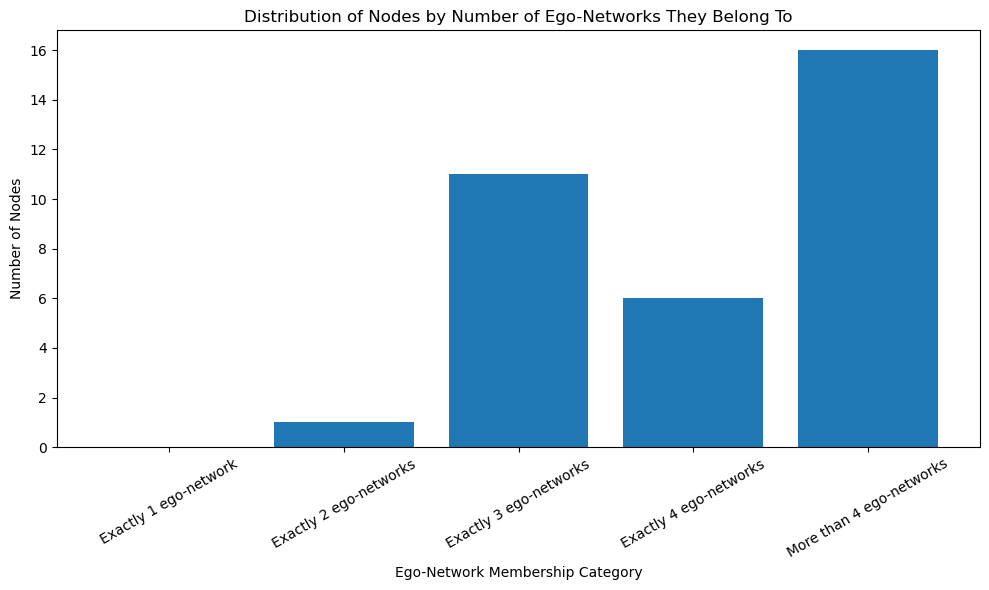

In [54]:
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

# Simulate a small example graph since we don't have facebook_combined.txt
graph = nx.karate_club_graph()  # Use a well-known social network graph for illustration

# Initialize a dictionary to store the ego-networks each node belongs to
node_to_egonets = defaultdict(list)

# Compute ego-networks for all nodes in the graph
for node in graph.nodes():
    ego_net = nx.ego_graph(graph, node)  # Get the ego-network for the node
    for ego_node in ego_net.nodes():
        node_to_egonets[ego_node].append(node)

# Count how many ego-networks each node belongs to
nodes_egonet_counts = {node: len(egonets) for node, egonets in node_to_egonets.items()}

# Categorize nodes based on the number of ego-networks they belong to
categories = {
    "Exactly 1 ego-network": 0,
    "Exactly 2 ego-networks": 0,
    "Exactly 3 ego-networks": 0,
    "Exactly 4 ego-networks": 0,
    "More than 4 ego-networks": 0,
}

for count in nodes_egonet_counts.values():
    if count == 1:
        categories["Exactly 1 ego-network"] += 1
    elif count == 2:
        categories["Exactly 2 ego-networks"] += 1
    elif count == 3:
        categories["Exactly 3 ego-networks"] += 1
    elif count == 4:
        categories["Exactly 4 ego-networks"] += 1
    else:
        categories["More than 4 ego-networks"] += 1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), categories.values())
plt.title("Distribution of Nodes by Number of Ego-Networks They Belong To")
plt.xlabel("Ego-Network Membership Category")
plt.ylabel("Number of Nodes")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()